# - Assignment -
## Uber Supply-Demand Gap

In [134]:
# Importing Libraries needed for assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [135]:
# Reading Data from csv file
UberRequestData = pd.read_csv("Uber Request Data.csv")
UberRequestData.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [136]:
#Enquiring about the Data 
UberRequestData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [137]:
#Finding the number of null values in dataframe
UberRequestData.isnull().sum()/len(UberRequestData.index)*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [138]:
#Converting Timestamp column to Data type
UberRequestData['Request timestamp']=pd.to_datetime(UberRequestData['Request timestamp'])
UberRequestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.2+ KB


## Cleaning Data

In [139]:
# Cleaning Data of Unnecessary Information i.e dropping Drop Timestamp as this field is null for all incompleted or
# unfulfilled requests and Dropping Driver Id as it is not needed for analysis.
UberRequestData = UberRequestData.drop(['Drop timestamp', 'Driver id'],axis = 1)
UberRequestData.head()

,Request id,Pickup point,Status,Request timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00
2,1807,City,Trip Completed,2016-12-07 09:17:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00
4,3112,City,Trip Completed,2016-07-13 08:33:16


In [140]:
#Finding the number of null values in dataframe after dropping 2 columns
UberRequestData.isnull().sum()/len(UberRequestData.index)*100

Request id           0.0
Pickup point         0.0
Status               0.0
Request timestamp    0.0
dtype: float64

## Creating Derived Columns

### Creating Request Time Slot Column

In [141]:
#Creating a Request_Timeslot column to get the period of the request made. This field is very important as to know at which 
# duration of the day customers are facing problems mostly, i.e. during Early Morning hours, Late Evening hours etc.
UberRequestData = UberRequestData.assign(
    Request_TimeSlot=pd.cut(
        UberRequestData["Request timestamp"].dt.hour,
        [-1,5,11,17,23],
        labels=['Early Morning', 'Morning', 'Afternoon', 'Late Evening']))
UberRequestData.head()

,Request id,Pickup point,Status,Request timestamp,Request_TimeSlot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,Afternoon
2,1807,City,Trip Completed,2016-12-07 09:17:00,Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,Late Evening
4,3112,City,Trip Completed,2016-07-13 08:33:16,Morning


In [142]:
#Number of times Uber booking request is received at the different Day Slots.
UberRequests = UberRequestData.groupby('Request_TimeSlot')['Request timestamp'].count()

### Creating Day of Week Column

In [143]:
#Creating a derived column AS 'Day of Week'. It records the day of the request
UberRequestData['Day of Week'] = UberRequestData['Request timestamp'].dt.day_name()
UberRequestData.head()

,Request id,Pickup point,Status,Request timestamp,Request_TimeSlot,Day of Week
0,619,Airport,Trip Completed,2016-11-07 11:51:00,Morning,Monday
1,867,Airport,Trip Completed,2016-11-07 17:57:00,Afternoon,Monday
2,1807,City,Trip Completed,2016-12-07 09:17:00,Morning,Wednesday
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,Late Evening,Wednesday
4,3112,City,Trip Completed,2016-07-13 08:33:16,Morning,Wednesday


### Creating Hour of request column

In [144]:
#Creating a derived column As 'Hour of Request'. It records the hour at which request is made.
UberRequestData['Hour of Request'] = UberRequestData['Request timestamp'].dt.hour
UberRequestData.head()

,Request id,Pickup point,Status,Request timestamp,Request_TimeSlot,Day of Week,Hour of Request
0,619,Airport,Trip Completed,2016-11-07 11:51:00,Morning,Monday,11
1,867,Airport,Trip Completed,2016-11-07 17:57:00,Afternoon,Monday,17
2,1807,City,Trip Completed,2016-12-07 09:17:00,Morning,Wednesday,9
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,Late Evening,Wednesday,21
4,3112,City,Trip Completed,2016-07-13 08:33:16,Morning,Wednesday,8


<Figure size 720x504 with 0 Axes>

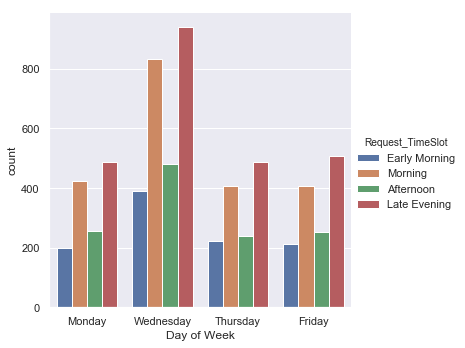

In [145]:
#Finding out the timeslot when the demand is high for Uber.
plt.figure(figsize=(10, 7))
sns.catplot(x = 'Day of Week', kind = 'count', hue = 'Request_TimeSlot', data =UberRequestData)

## 1. More pressing problem for Uber - Cancelled Rides or Car Not Available 

In [146]:
# Creating a new DataFrame containing only the unfulfiled requests for Uber(Cancelled or Car Not Available)
# i.e non - Trip Completed Requests
UnfulfiledTripsData = UberRequestData[UberRequestData.Status != "Trip Completed"]
UnfulfiledTripsData.head()


,Request id,Pickup point,Status,Request timestamp,Request_TimeSlot,Day of Week,Hour of Request
2831,2905,City,Cancelled,2016-07-13 06:08:41,Morning,Wednesday,6
2832,4805,City,Cancelled,2016-07-14 17:07:58,Afternoon,Thursday,17
2833,5202,Airport,Cancelled,2016-07-14 20:51:37,Late Evening,Thursday,20
2834,5927,City,Cancelled,2016-07-15 10:12:40,Morning,Friday,10
2835,2347,Airport,Cancelled,2016-12-07 19:14:00,Late Evening,Wednesday,19


In [147]:
UnfulfiledTripsData.tail()

,Request id,Pickup point,Status,Request timestamp,Request_TimeSlot,Day of Week,Hour of Request
6740,6745,City,No Cars Available,2016-07-15 23:49:03,Late Evening,Friday,23
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,Late Evening,Friday,23
6742,6751,City,No Cars Available,2016-07-15 23:52:06,Late Evening,Friday,23
6743,6754,City,No Cars Available,2016-07-15 23:54:39,Late Evening,Friday,23
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,Late Evening,Friday,23


##  A bar plot showing the difference clearly between the two issues

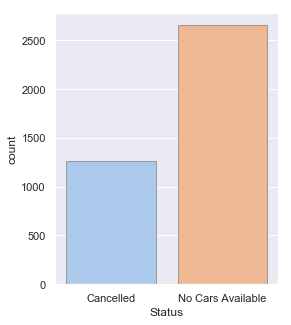

In [148]:

plt.figure(figsize=(4, 5))
sns.countplot(x="Status", data=UnfulfiledTripsData, palette="pastel", edgecolor = ".6" )
plt.show()

##  A bar plot to diffentiate the unfulfilled requests based on Pickup Point
### - Airport or City -

<Figure size 432x288 with 0 Axes>

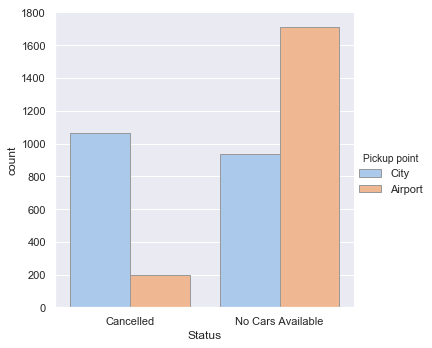

In [149]:
plt.figure(figsize=(6, 4))
sns.catplot(x="Status", hue="Pickup point", kind="count", palette="pastel", edgecolor=".6", data=UnfulfiledTripsData);
plt.show()

In [150]:
UnfulfiledTripsData.head(10)

,Request id,Pickup point,Status,Request timestamp,Request_TimeSlot,Day of Week,Hour of Request
2831,2905,City,Cancelled,2016-07-13 06:08:41,Morning,Wednesday,6
2832,4805,City,Cancelled,2016-07-14 17:07:58,Afternoon,Thursday,17
2833,5202,Airport,Cancelled,2016-07-14 20:51:37,Late Evening,Thursday,20
2834,5927,City,Cancelled,2016-07-15 10:12:40,Morning,Friday,10
2835,2347,Airport,Cancelled,2016-12-07 19:14:00,Late Evening,Wednesday,19
2836,3806,Airport,Cancelled,2016-07-13 20:57:49,Late Evening,Wednesday,20
2837,4451,City,Cancelled,2016-07-14 08:38:38,Morning,Thursday,8
2838,5023,Airport,Cancelled,2016-07-14 19:04:08,Late Evening,Thursday,19
2839,80,City,Cancelled,2016-11-07 04:47:00,Early Morning,Monday,4
2840,534,City,Cancelled,2016-11-07 10:01:00,Morning,Monday,10


## Bar plot to differentiate the unfulfilled rides based on Pickup Point and duration of the Day


[]

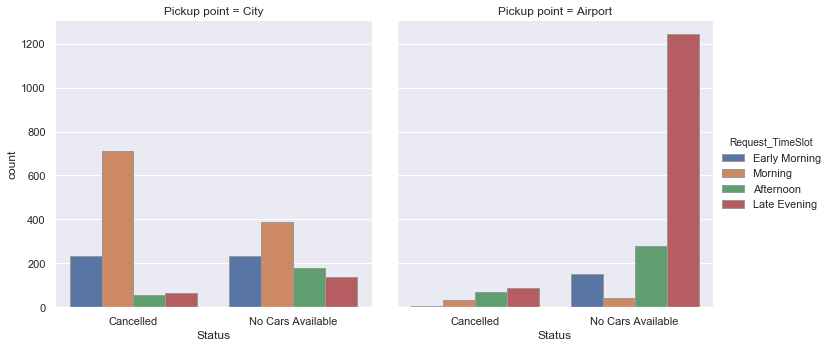

In [151]:
sns.catplot(x="Status", hue="Request_TimeSlot",col = "Pickup point", kind="count", edgecolor=".6", data=UnfulfiledTripsData);
plt.plot()

[]

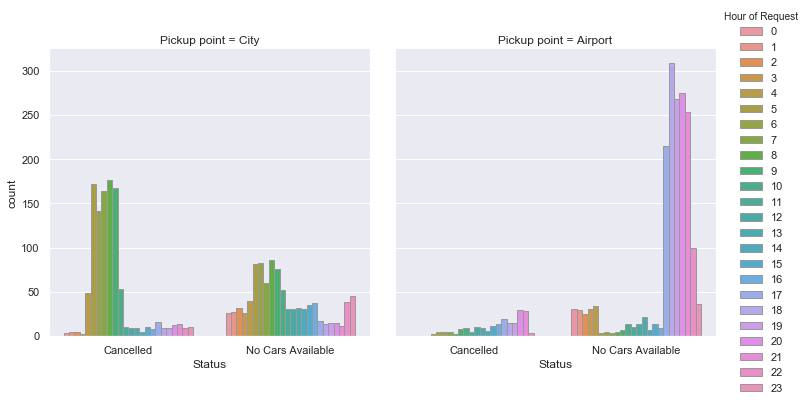

In [152]:
#Plot showing the number of No Cars Available request are higher when the pickup is from Airport at late hours of the Day.
#And for pickup from city Cancelled requests are higher as the drivers are cancelling the request reaching them.
sns.catplot(x="Status", hue="Hour of Request",col = "Pickup point", kind="count", edgecolor=".6", data=UnfulfiledTripsData);
plt.plot()

## 2.Gap between demand and supply for Uber

In [154]:
# Creating a function to find out the gap in demand and supply for Uber
# gap_in_DemandSupply returns the values of total request minus the trips completed 
# The output of this function will be the sum of the number of trips which are either Cancelled or can be fulfiled due to the unavailability of car.
def gap_in_DemandSupply(df):
    return df['Cancelled'] + df['No Cars Available'] + df['Trip Completed'] - df['Trip Completed']


### a. Time Slot for highest demand-supply gap

In [155]:
#Creating a pivot table to group the Status of requests based on the duration of the day
UberRequestData_Grouped = pd.pivot_table(UberRequestData, index = 'Request_TimeSlot', columns = ['Status'], values ='Request timestamp', aggfunc = 'count')

In [156]:
#View the pivot table
UberRequestData_Grouped

Status,Cancelled,No Cars Available,Trip Completed
Request_TimeSlot,,,
Early Morning,241,383,399
Morning,744,428,900
Afternoon,126,460,642
Late Evening,153,1379,890


In [157]:
#Creating a new column Gap(Demand-Supply) 
# Calling function gap_in_DemandSupply to find the gap of demand and supply at different duration of the day 
# Save the gap in the new column Gap(Demand-Supply)

UberRequestData_Grouped['Gap(Demand-Supply)'] = UberRequestData_Grouped.apply(gap_in_DemandSupply, axis = 1)

In [158]:
UberRequestData_Grouped

Status,Cancelled,No Cars Available,Trip Completed,Gap(Demand-Supply)
Request_TimeSlot,,,,
Early Morning,241,383,399,624
Morning,744,428,900,1172
Afternoon,126,460,642,586
Late Evening,153,1379,890,1532


## Line Plot to find the time slots when the highest gap exists

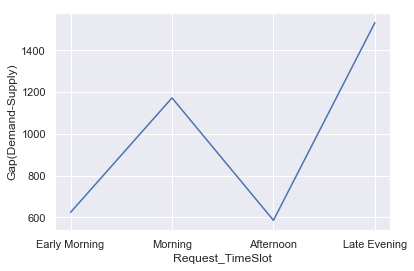

In [159]:
# Creating a line plot to show where the peak in gap of demand and supply is highest

sns.lineplot(x = UberRequestData_Grouped.index, y = 'Gap(Demand-Supply)', data = UberRequestData_Grouped )
plt.show()


### b. Types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots 

In [160]:
# Creating pivot table to group the request based on the Pickup point and the Status of the request at different Request Time Slots
UberRequestData_Groupedby_PickupPoint = pd.pivot_table(UberRequestData, index = 'Request_TimeSlot', columns = ['Pickup point', 'Status'], values ='Request timestamp', aggfunc = 'count')

In [161]:
#Lets view the pivot table to get a feel of data
UberRequestData_Groupedby_PickupPoint.head()

Pickup point       Airport                                       City  \
Status           Cancelled No Cars Available Trip Completed Cancelled   
Request_TimeSlot                                                        
Early Morning            6               151            188       235   
Morning                 33                41            399       711   
Afternoon               69               279            299        57   
Late Evening            90              1242            441        63   

Pickup point                                       
Status           No Cars Available Trip Completed  
Request_TimeSlot                                   
Early Morning                  232            211  
Morning                        387            501  
Afternoon                      181            343  
Late Evening                   137            449

In [162]:
# Calling function gap_in_DemandSupply to know the gap in demand-supply for different pickup points and Request time slots
# This function is called twice once for Request having origin Airport and other for City
# The data finally we have in the dataframe shows us that which is more pressing problem for uber and from where. 
# The gap is maximum for late evening requests from airport 
UberRequestData_Groupedby_PickupPoint['Gap(Demand-Supply)_Airport'] = UberRequestData_Groupedby_PickupPoint['Airport'].apply(gap_in_DemandSupply, axis = 1)
UberRequestData_Groupedby_PickupPoint['Gap(Demand-Supply)_City'] = UberRequestData_Groupedby_PickupPoint['City'].apply(gap_in_DemandSupply, axis = 1)
UberRequestData_Groupedby_PickupPoint

Pickup point       Airport                                       City  \
Status           Cancelled No Cars Available Trip Completed Cancelled   
Request_TimeSlot                                                        
Early Morning            6               151            188       235   
Morning                 33                41            399       711   
Afternoon               69               279            299        57   
Late Evening            90              1242            441        63   

Pickup point                                      Gap(Demand-Supply)_Airport  \
Status           No Cars Available Trip Completed                              
Request_TimeSlot                                                               
Early Morning                  232            211                        157   
Morning                        387            501                         74   
Afternoon                      181            343                        348   
Late Evening                   137            449                       1332   

Pickup point     Gap(Demand-Supply)_City  
Status                                    
Request_TimeSlot                          
Early Morning                        467  
Morning                             1098  
Afternoon                            238  
Late Evening                         200

## Plots showing the gap in demand and supply for Airport-City(Airport) and City-Airport(City) requests

### Airport-City

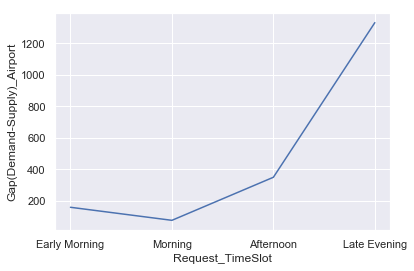

In [163]:
sns.lineplot(x = UberRequestData_Groupedby_PickupPoint.index, y = 'Gap(Demand-Supply)_Airport', data = UberRequestData_Groupedby_PickupPoint )
plt.show()


### City-Airport

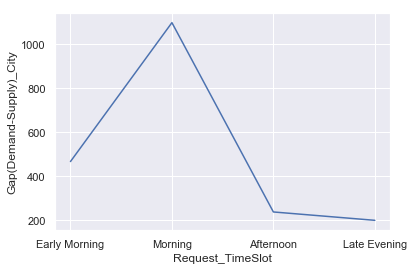

In [164]:
sns.lineplot(x = UberRequestData_Groupedby_PickupPoint.index, y = 'Gap(Demand-Supply)_City', data = UberRequestData_Groupedby_PickupPoint )
plt.show()


## Lets Compare the two in one plot

In [165]:
#Lets create a dataframe containong only the Gaps
ComparisonDataframe = UberRequestData_Groupedby_PickupPoint.loc[:,['DaySlot','Gap(Demand-Supply)_Airport', 'Gap(Demand-Supply)_City']]

In [166]:
ComparisonDataframe

Pickup point,Gap(Demand-Supply)_Airport,Gap(Demand-Supply)_City
Status,,
Request_TimeSlot,,
Early Morning,157,467
Morning,74,1098
Afternoon,348,238
Late Evening,1332,200


In [167]:
# Creating a function to create a line plot from Comparison Dataframe 
def gap_plot(dayslot, gap):
    data = ComparisonDataframe.loc[dayslot, gap]
    sns.lineplot(x=data.index, y=data.values)

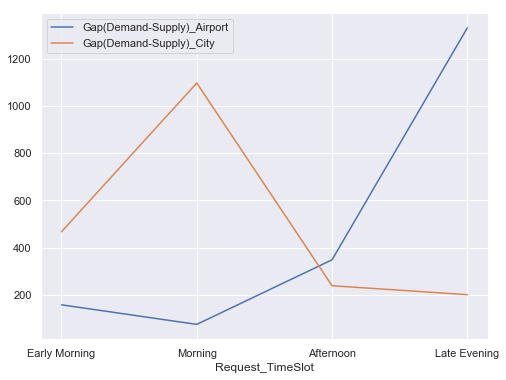

In [168]:
#Calling the function for the gaps in Airport-City and city-Airport demand-supply data
plt.figure(figsize = (8, 6))

gaps = ['Gap(Demand-Supply)_Airport', 'Gap(Demand-Supply)_City']

for gap in gaps:
    gap_plot( ComparisonDataframe.index, gap)


plt.legend(gaps)